# Туннелирование миллимитровых радиоволн

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.cm as cm

### Зависимость интенсивности прошедешей волны от величины зазора 

Экспериментальные данные

Погрешность измерения 
- $\Delta l = 0.05 \ мм$
- $\Delta I = 2 \ хз$

In [42]:
exp1Data = pd.read_csv("exp_1.csv")
exp1Data.length -= np.min(exp1Data.length)
lError, IError = 0.05, 2

In [43]:
def expon(x: np.ndarray, bias, lamb, bias2, lamb2):
    return lamb2 * np.exp(x * lamb + bias2) + bias

In [44]:
params, _ = curve_fit(f = expon, 
                      xdata = exp1Data.length, 
                      ydata = exp1Data.I, 
                      p0 = [0,0.2,0,1])

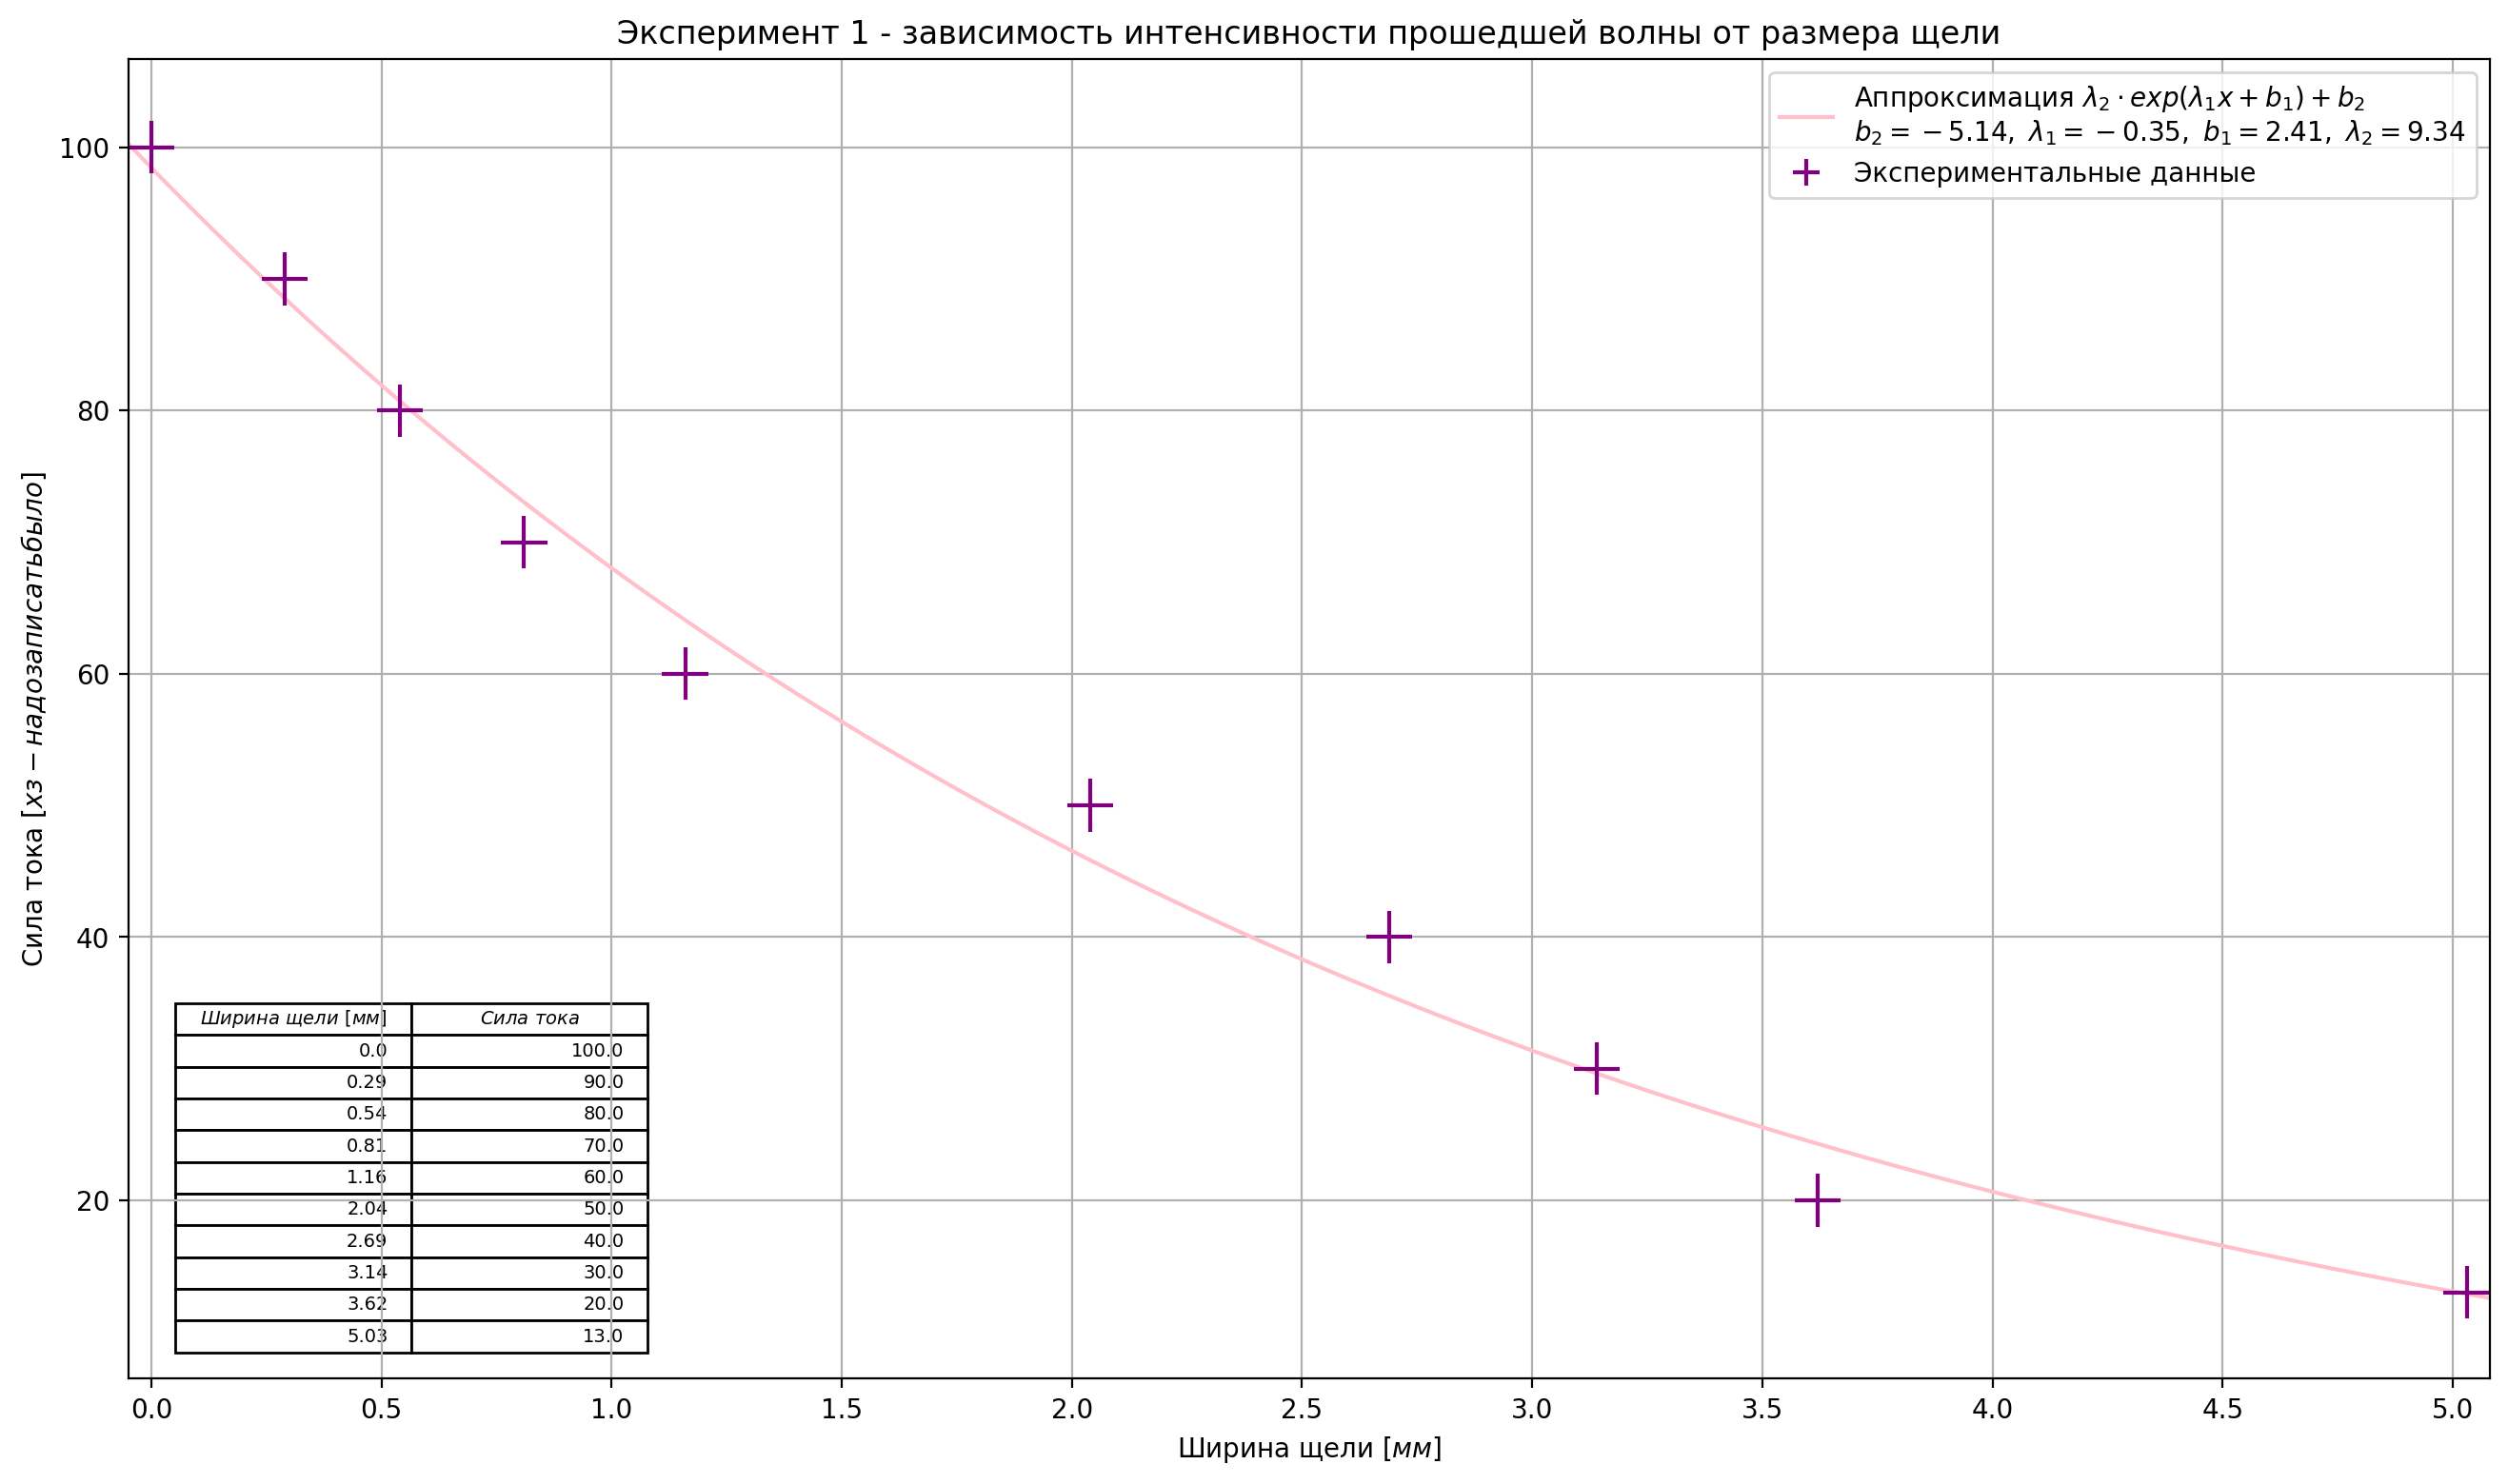

In [48]:
xAx = np.linspace(np.min(exp1Data.length) - 0.1, np.max(exp1Data.length) + 0.1, 1000)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)


plt.plot(xAx, 
         expon(xAx,*params), 
         color = 'pink', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' +  '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*params))
plt.errorbar(exp1Data.length, 
             exp1Data.I, 
             color = 'purple', 
             label = 'Экспериментальные данные',
             xerr = [lError for _ in exp1Data.length],
             yerr = [IError for _ in exp1Data.length],
             fmt = '_')

plt.xlim(min(exp1Data.length) - 0.05, max(exp1Data.length) + 0.05)
plt.xticks(np.arange(min(exp1Data.length),max(exp1Data.length),0.5))

plt.grid()
plt.ylabel("Сила тока $[хз - надо записать было]$")
plt.xlabel("Ширина щели $[мм]$")
plt.title("Эксперимент 1 - зависимость интенсивности прошедшей волны от размера щели")

plt.table(cellText = np.array([exp1Data.length.round(2), exp1Data.I]).T,
          loc = 'lower left',
          colWidths = [0.1, 0.1],
          colLabels = [r'$Ширина \ щели \ [мм]$', r'$Сила \ тока$'])
plt.legend();
plt.savefig("experiment1.svg")

### Зависимость интенсивности отражённой волны от величины зазора

In [47]:
lReflected = np.array([8.94, 8.76, 8.65, 8.33, 8.22, 7.90, 7.74, 7.41, 7.23, 6.84])
IReflected = np.array([100,  89,  80,  70,  58,  50,  38,  30, 18, 10])

In [50]:
lReflected -= np.min(lReflected)

In [64]:
paramsReflection, _ = curve_fit(f = expon, xdata = lReflected, ydata = IReflected, p0 = [0,0.2,0,1])

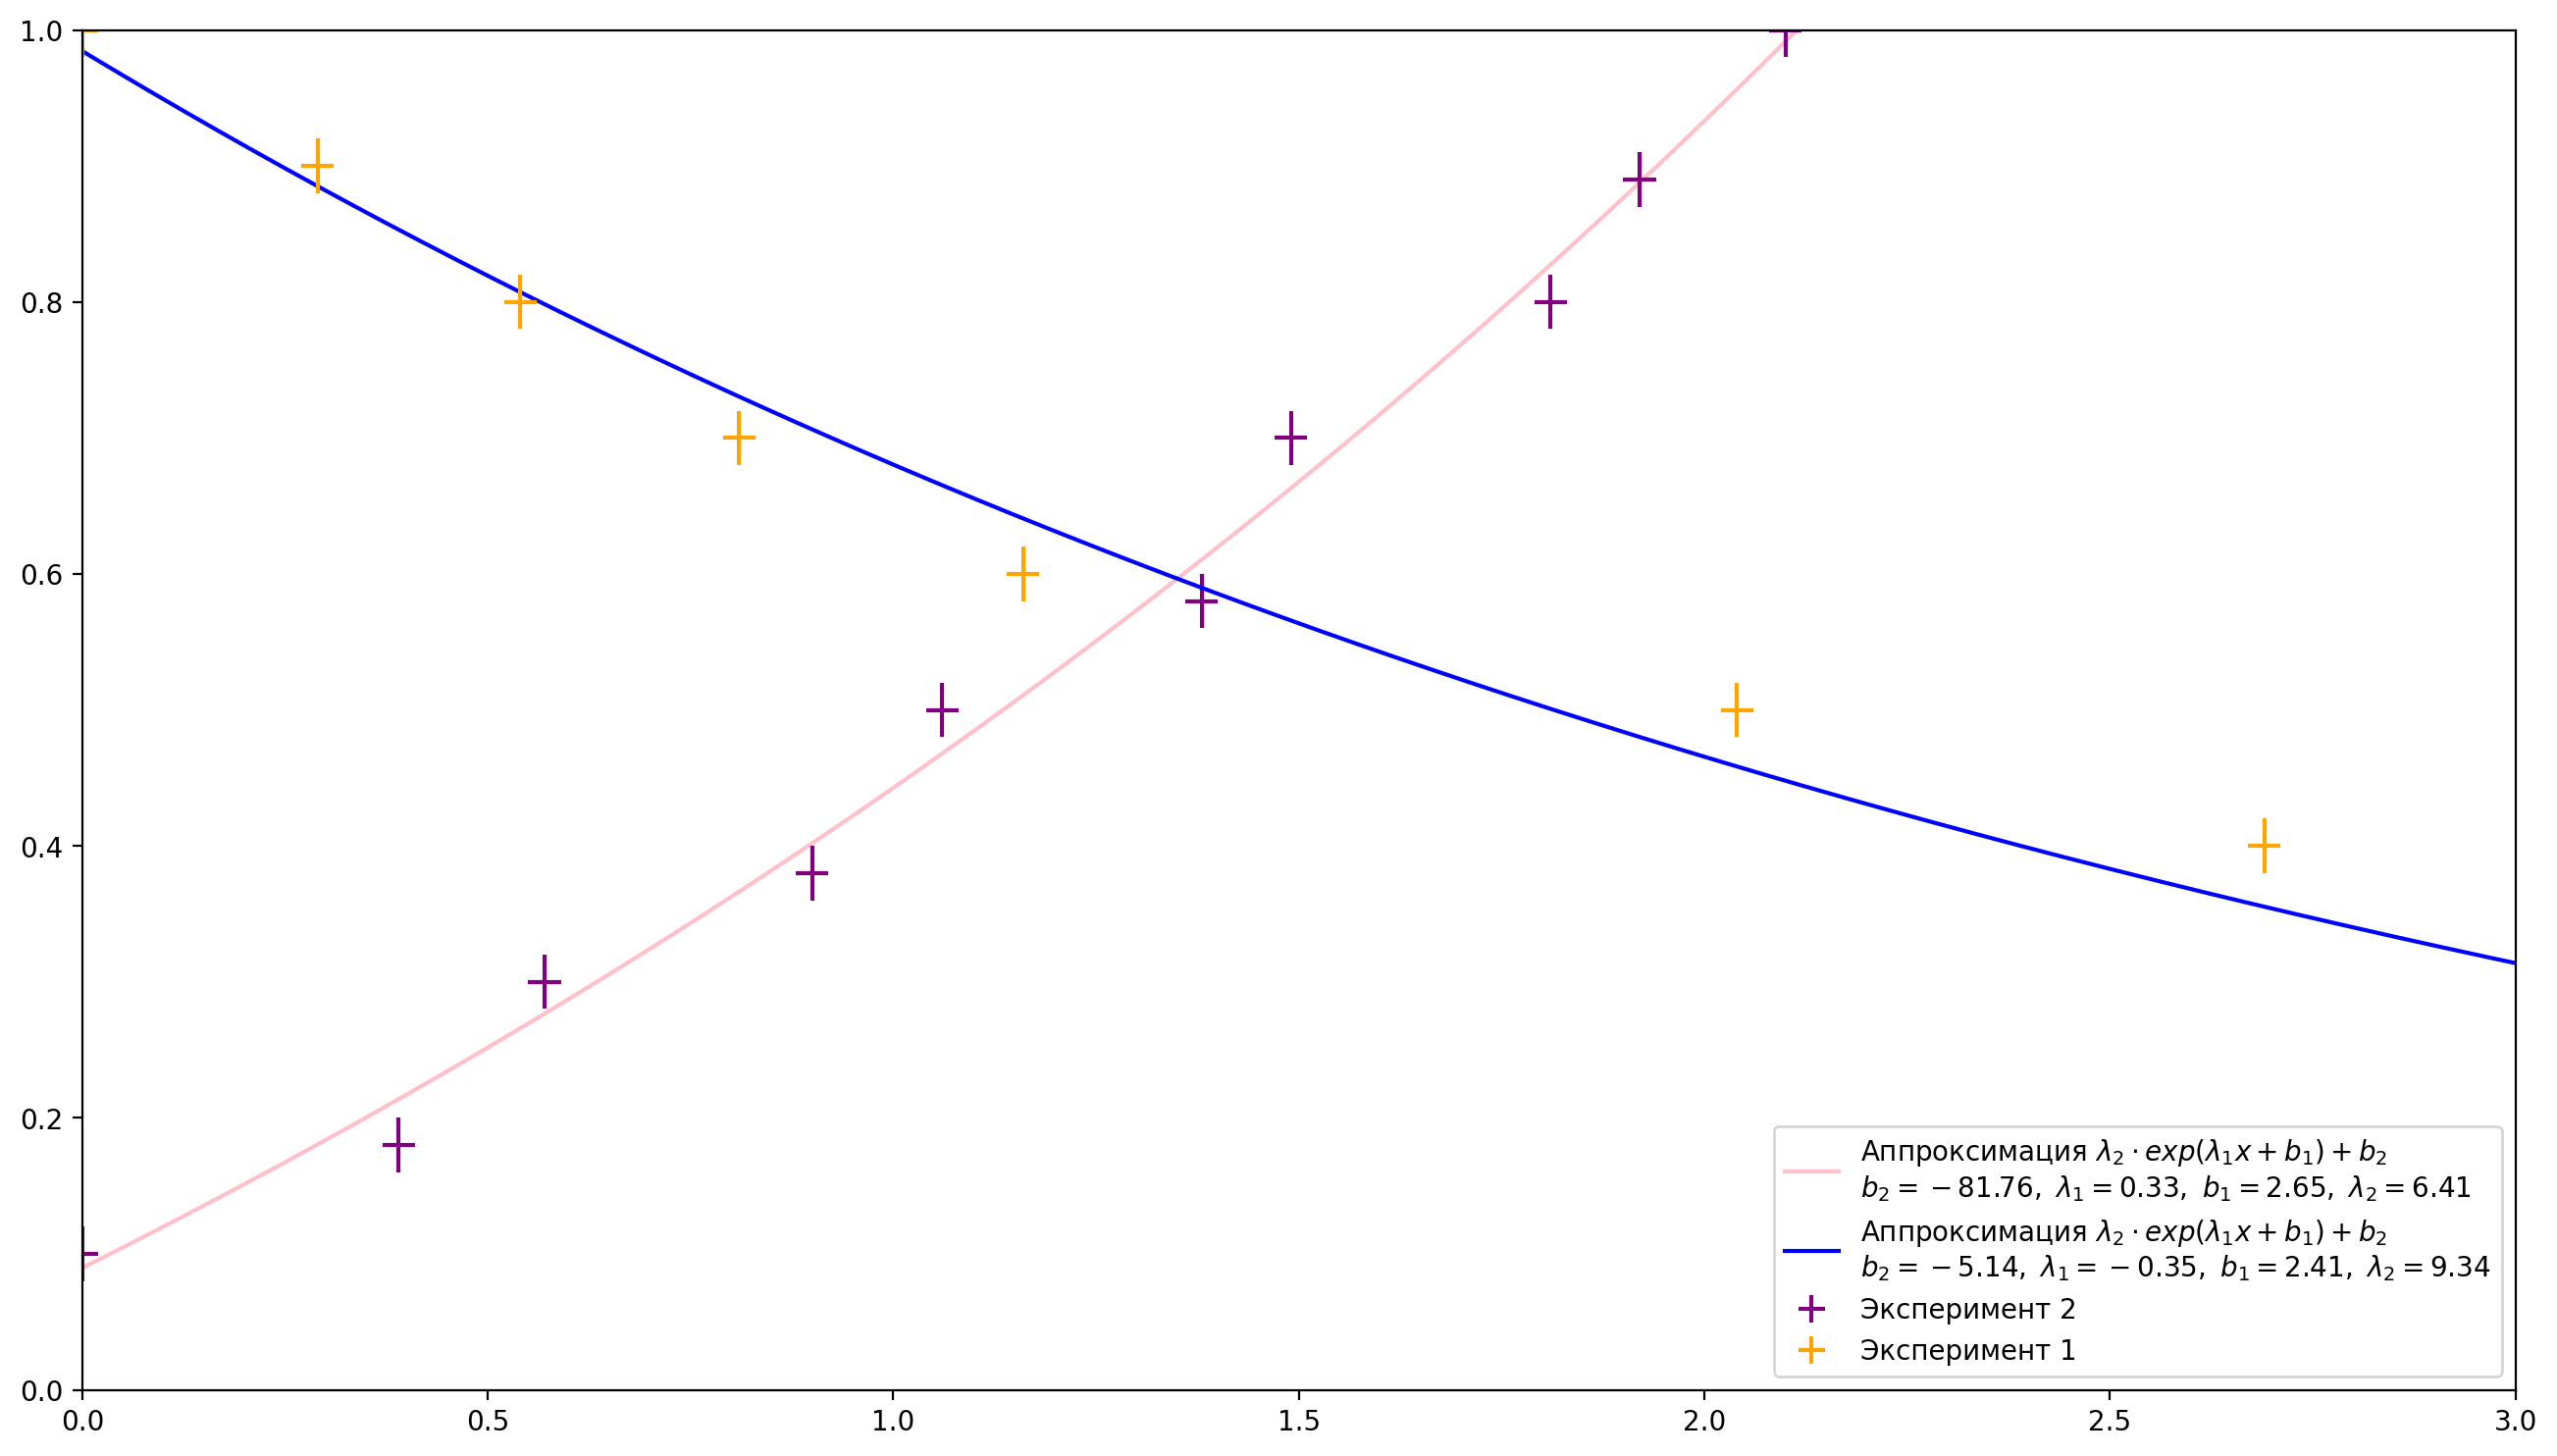

In [75]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)


plt.plot(xAx, 
         expon(xAx,*paramsReflection) / 100, 
         color = 'pink', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' + \
                 '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*paramsReflection))

plt.errorbar(lReflected,
             IReflected / 100, 
             color = 'purple', 
             label = 'Эксперимент 2',
             xerr = [lError for _ in l],
             yerr = [IError / 100 for _ in l],
             fmt = '_')


plt.plot(xAx, 
         expon(xAx,*params) / 100, 
         color = 'blue', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' +  '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*params))
plt.errorbar(l, I / 100, 
             color = 'orange', 
             label = 'Эксперимент 1',
             xerr = [lError for _ in l],
             yerr = [IError / 100 for _ in l],
             fmt = '_')
plt.xlim((0, 3))
plt.ylim(0,1)
plt.legend();

(0.0, 3.0)

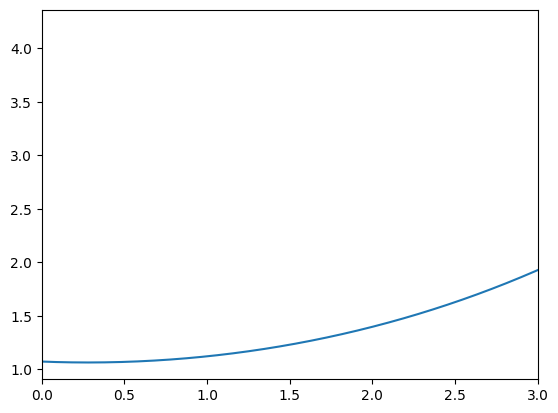

In [84]:
plt.plot(xAx, expon(xAx,*params) / 100 + expon(xAx,*paramsReflection) / 100)
plt.xlim(0,3)